In [60]:
%pip install sqlalchemy matplotsoccer mplsoccer dotenv pandas -q

Note: you may need to restart the kernel to use updated packages.


In [61]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Execute the SQL file
with open('data/data.sql', 'r') as sql_file:
    sql_script = sql_file.read()
cursor.executescript(sql_script)

conn.commit()

In [62]:
# Basic Analysis
def execute_query(query):
    return pd.read_sql_query(query, conn)

Below, you'll find a few sample (very basic) queries to get you started. Here you can see how we can use sql statements inside a Jupyter notebook.

In [63]:
# Event Types and Counts
event_counts = execute_query('''
SELECT et.name, COUNT(*) AS event_count
FROM matchevents me
JOIN eventtypes et ON me.eventtype_id = et.eventtype_id
GROUP BY et.name;
''')
print("\nEvent Counts:")
print(event_counts)


Event Counts:
                             name  event_count
0                 Alien Abduction            1
1       Massive Confetti Eruption            1
2     Referees Interpretive Dance            1
3           Squirrel Interference            1
4        Sudden Onset of Yodeling            1
5    Sudden Shift to Zero Gravity            1
6  Synchronized Seagull Formation            1
7    Unexpected Opera Performance            1


In [64]:
# Team Scores
team_scores = execute_query('''
SELECT t.team_name, SUM(m.home_score) + SUM(m.away_score) AS total_team_score
FROM matches m
JOIN teams t ON t.team_id = m.home_team_id OR t.team_id = m.away_team_id
GROUP BY t.team_name
''')
print("\nTeam Scores:")
print(team_scores)


Team Scores:
                  team_name  total_team_score
0      The Dancing Referees               105
1      The Flying Squirrels                98
2      The Opera Performers               999
3      The Seagull Squadron               122
4        The Yodeling Yetis                14
5  The Zero Gravity Zephyrs              1100


In [65]:
import pandas as pd

# Database connection parameters

# Query to fetch tracking data
query = """
SELECT ;
"""
tracking_df = pd.read_sql_query(query, conn)
tracking_df.head()

DatabaseError: Execution failed on sql '
SELECT ;
': near ";": syntax error

Connect to DB

In [87]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)




Filter on ball side

In [88]:
query = """
SELECT *
FROM spadl_actions 
WHERE game_id = '5uts2s7fl98clqz8uymaazehg' AND result = '0' AND start_x < 50
"""

ball_pos = pd.read_sql_query(query, conn)
ball_pos.describe()
ball_pos.head()


,id,game_id,period_id,seconds,player_id,team_id,start_x,start_y,end_x,end_y,action_type,result,bodypart
0,25193,5uts2s7fl98clqz8uymaazehg,1,151.0,2961iy0sg9zmy0r6fzbr2dmg9,4dtif7outbuivua8umbwegoo5,34.440,29.376,22.995,24.956,0,0,0
1,25219,5uts2s7fl98clqz8uymaazehg,1,207.0,6fdwd71dx2qu7uzzs3ozm9x7u,8y3iucyxguipljcmf87a11bk9,49.875,16.456,60.690,13.056,0,0,0
2,25225,5uts2s7fl98clqz8uymaazehg,1,214.0,7xohgebtjrdvhgamhfpp7w31m,4dtif7outbuivua8umbwegoo5,46.200,14.280,20.265,0.000,0,0,0
3,25231,5uts2s7fl98clqz8uymaazehg,1,250.0,9w8ka8b5aaxqaqlnit33glkb8,8y3iucyxguipljcmf87a11bk9,40.845,59.092,43.575,59.636,0,0,0
4,25242,5uts2s7fl98clqz8uymaazehg,1,279.0,39307g4mv5kms5rtlss0x756,4dtif7outbuivua8umbwegoo5,12.600,42.568,0.000,43.860,11,0,5


In [89]:
# filtered_ball_pos = ball_pos[ball_pos['x'] < 50]
# filtered_ball_pos.head()



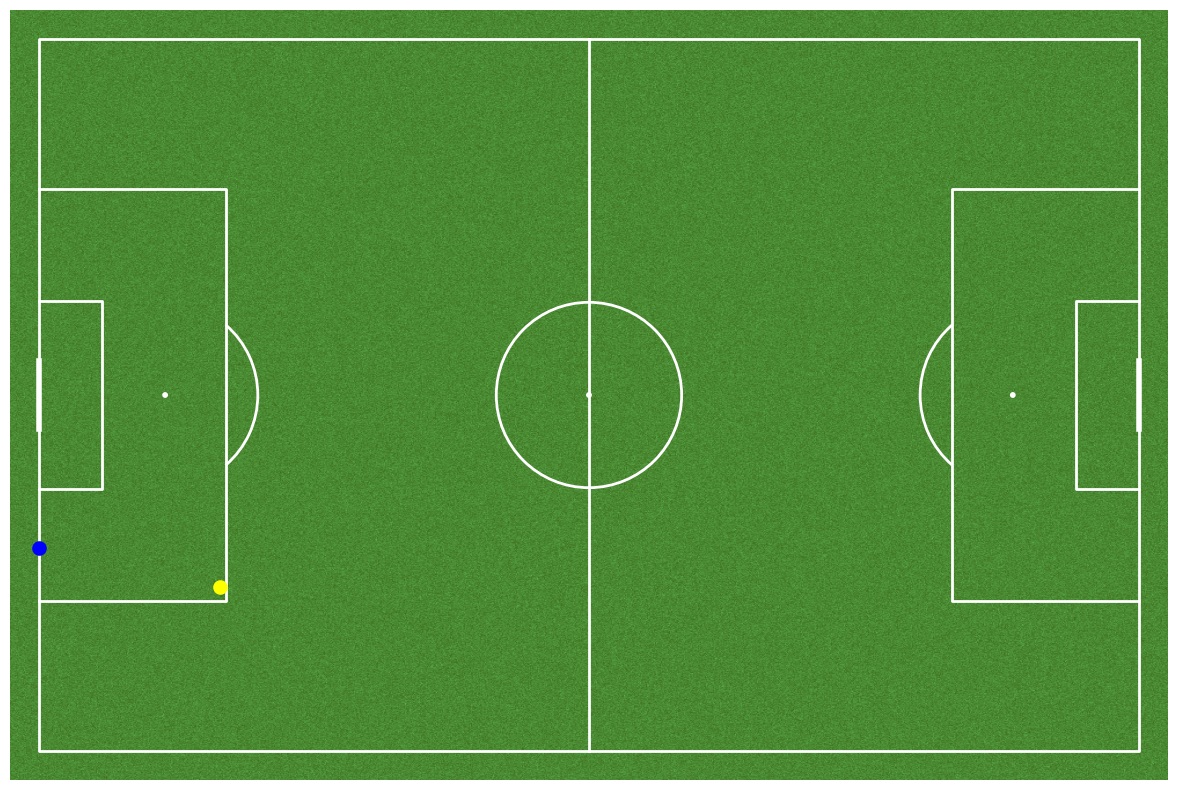

In [ ]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from IPython.display import display, clear_output
import time  # Optional, for adding delay between frames

def plotting_data(tracking_data):
    clear_output(wait=True)  # Clears previous output to avoid overlapping plots
    
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta', pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw(figsize=(12, 8))

    pitch.scatter(tracking_data['start_x'], tracking_data['start_y'], s=90, color='yellow', ax=ax, label='Ball')
    pitch.scatter(tracking_data['end_x'], tracking_data['end_y'], s=90, color='blue', ax=ax, label='Ball')

    plt.show()

# Loop through ball positions, updating the plot each time

plotting_data(ball_pos.iloc[42])
  # Optional delay for a smooth animation effect
